# Visualize and preprocess
Now that we've separated our data into the training, cross-validation and test set we can start to look in more detail at the data we've been provided by Google Brain & Kaggle. 

We should bear in mind that we've also copied a small portion of our _main_ data into a _sample_ folder, which is also structured into train, cv and test subsets. Additionally our dataset in the main section is **currently unbalanced** in that we have:

   1. A lot more examples in the _unknown_ category than other categories for train, cv & test sets.
   2. A lot fewer examples in the _silence_ category than other categories for train, cv & test sets.

In the _sample_ set we have a balanced mix. 

In [1]:
# first make sure we're in the parent dictory of our data/main folders.
!pwd

/c/Users/mateusz/Documents/Mateusz/Career/Machine Learning & AI/tensorflow_speech_recognition/tensorflow_speech_recognition


## Import
We'll need a couple of additional libraries so let's import them.

In [62]:
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.io import wavfile

In [80]:
# we'll only want to see certain warnings once (stops them from polluting the notebook)
# particularly the ones about future deprecations in our dependencies
import warnings
warnings.filterwarnings('once')

## Utils
Define useful functions.

In [70]:
def display_audio(path_to_wav):
    """
    Simple function for displaying playable audio files in jupyter
    """
    # get rate and data
    r, d = get_wav_info(path_to_wav)
    # show playable audio
    return IPython.display.Audio(data=data, rate=rate)


For the pyplot spectrogram.

In [71]:
def get_wav_info(wav_file):
    """
    Read a wav file returning the sample rate (number of audio samples per second, in Hz) and the actual raw data.
    """
    rate, data = wavfile.read(wav_file)
    return rate, data

def graph_spectrogram(wav_file):
    """
    Draw a graph of a spectrogram using pyplot.
    """
    rate, data = get_wav_info(wav_file)
    nfft = 256    # windowing segments length
    fs = 16000    # sampling frequency of our files is 16000
    plt.figure(figsize=(10,6))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram of {}'.format(wav_file))
    pxx, freqs, bins, im = plt.specgram(data, nfft,fs)

For the librosa spectrogram.

In [72]:
def librosa_mel_spectrogram(wav_file, mels=256):
    """
    Draw a graph of a mel spectrogram using librosa.
    """
    y, sr = librosa.load(path_to_a_wav)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=mels)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(10,6))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Descriptions
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Mel spectrogram of {}'.format(wav_file))

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

## Visualize
Let's turn .wav files into spectrograms.

A spectrogram is a visual representation of the spectrum of frequencies in a sound. Horizontal axis represents time, vertical axis represents the frequency, and the color represents amplitude.

In [73]:
# grab a sample file
path_to_sample = "data\\sample"
path_to_a_wav = os.path.join(path_to_sample, "cv\\unknown\\9db2bfe9_nohash_4_five.wav")

In [79]:
# let's listen to it first
display_audio(path_to_a_wav)

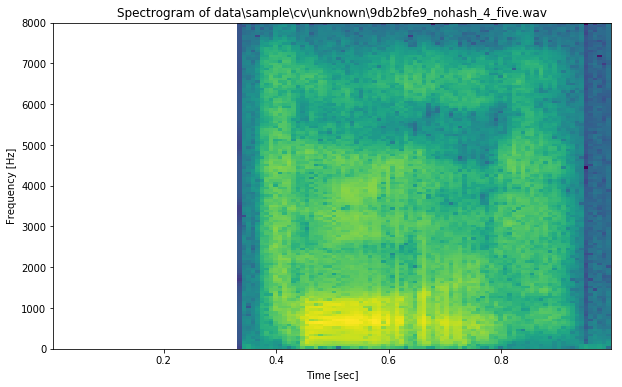

In [78]:
# show spectrogram (pyplot version)
graph_spectrogram(path_to_a_wav)

We can also use a **mel spectrogram** through librosa, here we can see that the frequency scale is logarithmic and that librosa handles 0s in the data better. With the example of sample\cv\unknown\9db2bfe9_nohash_4_five.wav we can see that using pyplot leaves zeros white on the graph, whereas librosa treats them as silence and draws them black. 

This could be a useful property if we plan on using the spectrogram images as our actual training examples and use convolutions on them.

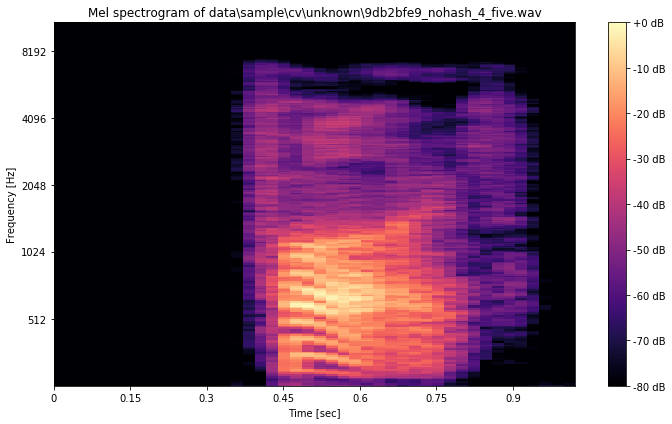

In [77]:
# graph librosa mel spectrogram
librosa_mel_spectrogram(path_to_a_wav)

## NEXT -> figure out what numpy can get from that

These guys decided to work on the images! Instead of the wav files, they use the spectrograms as input to a conv network I think: https://github.com/jjelosua/ML_audio_classification